In [3]:
import pandas as pd
import os 
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [4]:
os.chdir('E:\PythonImaricusData\DecisionTree')
df =  pd.read_csv('car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
#TRIED ADDING COLUMN NAMES (lEARNING PURPOSE)
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'] 
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    print(df[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [10]:
x=df.drop(['class'],axis=1)
y=df['class']

In [11]:
# split x and y 
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train,y_test = train_test_split(x,y, test_size=0.33,random_state=42)

In [12]:
x_test.shape

(570, 6)

In [13]:
x_train.shape

(1157, 6)

### Encoding the Data

In [14]:
pip install category-encoders

Note: you may need to restart the kernel to use updated packages.


In [15]:
import category_encoders as ce

In [17]:
#encode variables with original encoding
encoder=ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']) #IMP
x_train=encoder.fit_transform(x_train)
x_test=encoder.fit_transform(x_test)

In [18]:
x_train

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1
...,...,...,...,...,...,...
1130,3,3,2,2,3,1
1294,3,4,1,2,3,3
860,2,4,1,2,3,1
1459,4,2,3,1,2,3


### Accuracy

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
# Initiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [27]:
y_pred_gini=clf_gini.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score
print('Model accuracy with  gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy with  gini index: 0.7263


In [29]:
y_pred_train=clf_gini.predict(x_train)

In [30]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7848


In [37]:
clf_gini.score(x_train, y_train)

0.7847882454624028

In [31]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.7848
Test set score: 0.7263


## Visualize Decision Tree 

[Text(0.3333333333333333, 0.875, 'X[5] <= 1.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.5\ngini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 2.5\ngini = 0.63\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'gini = 0.498\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.654\nsamples = 258\nvalue = [133, 51, 35, 39]')]

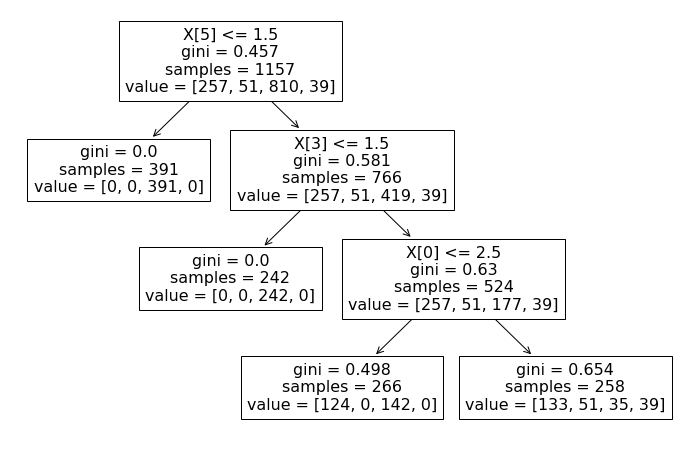

In [32]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train, y_train))

In [33]:
pip install graphviz

In [34]:
import graphviz 

In [35]:
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=x_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

In [36]:
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH